## Support Vector Machines
Support vector machine (SVM) is one of the most popular and widely used supervised learning algorithm for both regression and classification task. It is a non-probabilistic linear classifier because unlike other classifiers like logistic regression which outputs the class probability for given input example, it assigns one or the other class. However, there are techniques such as [Platt Scaling](https://en.wikipedia.org/wiki/Platt_scaling), which can transform the class prediction into probability distribution over classes. We will not be covering this technique in this tutorial, but I would highly recommend you to check about this if you want to use SVM in probabilistic setting. SVMs can also be used in non-linear classification problem, by using something called *Kernel Trick*. A linearly separable data points refers that the data points can be separated by a straight line (in 2-dimension), a plane (in 3-dimension) or a hyperplane (in higher dimension) and a non-linearly separable examples refers that the data points can't be separated by a straight line or a plane or a hyperplane in the feature space.

The main idea of SVM algorithm is to find an optimal hyperplane that separates the classes with a gap as wide as possible in the mapped space. For any new example, the same space is used and a class label is assigned based on which side of the gap they fall. So, in SVM the task is to find a hyper plane that maximizes the gap between the two classes.

### The Optimal Hyperplane Algorithm
Let the set of labeled training dataset is:<br />
$(x_1,y_1), (x_2, y_2), ....., (x_N, y_N), y_i \in \{-1, 1\} \forall_i$.....................(1)<br  />

It is said to be linearly separable if there exists a vector $\boldsymbol{w}$ and a scalar $b$ such that: <br />
$\boldsymbol{w}.\boldsymbol{x_i} + b \geq 1 \; \; if \; \;y_i = 1$<br />
$\boldsymbol{w}.\boldsymbol{x_i} + b \leq -1 \; \; if \; \;y_i = -1$ ...............(2) <br />

The above equalities in (2) can be rewritten as: <br />
$y_i(\boldsymbol{w}.\boldsymbol{x_i} + b) \geq 1 \; \; \; \; i = 1,2,3,..., N$<br />
=$y_i(\boldsymbol{w}.\boldsymbol{x_i} + b) - 1 \geq 0$ ................ (3) <br />

The optimal hyperplane<br />
$\boldsymbol{w_0.x}+b_0 = 0$<br />

is the unique one that separates the training data with a maximal margin. The distance $\rho(\boldsymbol w, b)$ is given by:<br />

$\rho(\boldsymbol w, b) = min \frac {\boldsymbol{x^+.w}}{|\boldsymbol w |} -  max \frac {\boldsymbol{x^-.w}}{|\boldsymbol w |}$ ................(4)<br />
where $\boldsymbol x^+$ represents positive class and $\boldsymbol x^-$ represents negative class.The optimal hyperplane $(\boldsymbol w_0, b_0)$  is the one that maximizes the distance in equation (4).<br />
$\rho(\boldsymbol w_0, b_0) = \frac {1-b}{|\boldsymbol w_0|} - \frac{-1-b}{|\boldsymbol w_0|} = \frac{2}{|\boldsymbol w_0 |} = \frac {2}{\sqrt{\boldsymbol{w_0.w_0}}}$........(5) <br />

So to maximize the the distance, we need to mininimize $\boldsymbol {w.w}$ under the constraints (3). So we can formalize this as: <br />
$minimize \frac{1}{2}\boldsymbol{w.w}$ <br />
**such that :** $y_i(\boldsymbol{w}.\boldsymbol{x_i} + b) - 1 \geq 0$ <br />
Hence, finding an optimal hyperplane is a quadratic programming problem. And to solve this we can construct a Lagrangian <br />
$L(\boldsymbol{w}, b, \boldsymbol \Lambda) = \frac{1}{2}\boldsymbol{w.w} - \sum_{i=1}^N \alpha_i[y_i(\boldsymbol{x_i.w}+b) - 1]$......(6) <br />
where $\boldsymbol\Lambda^T=(\alpha_1, ...., \alpha_t) $ is a vector of non-negative Lagrange multipliers corresponding to the constraints (3).<br />
The solution of the optimization problem is determined by the saddle point where the minimum should be taken with respect to both the parameters $\boldsymbol w$ and b, and the maximum should be taken with respect to the Lagrange multipliers $\boldsymbol \Lambda$. At the minimum point: <br />
$\left.\frac{dL(\boldsymbol{w}, b, \boldsymbol \Lambda)}{dw}\right|_\boldsymbol{w=w_0} = (w_0 - \sum_{i=1}^N\alpha_iy_i\boldsymbol x_i) = 0$..........(7)<br />
$\left.\frac{dL(\boldsymbol{w}, b, \boldsymbol \Lambda)}{db}\right|_\boldsymbol{b=b_0} = \sum_{\alpha_i} y_i\alpha_i= 0$.........(8)<br />

From 7 we get: <br />
$w_0 = \sum_{i=1}^N\alpha_iy_i\boldsymbol x_i$............(9) <br />
Substituting 8 and 9 into 6: <br />
$\boldsymbol{W(\Lambda}) = \frac{1}{2}\boldsymbol{w_0.w_0}-\boldsymbol w_0 \sum_{i=1}^N \alpha_iy_i\boldsymbol x_i - b\sum_{i=1}^N\alpha_iy_i + \sum_{i=1}^N\alpha_i$<br /><br />
=$\sum_{i=1}^N\alpha_i -\frac{1}{2}\boldsymbol {w_0.w_0}$...................(10)<br /><br />
=$\sum_{i=1}^N\alpha_i - \frac{1}{2}\sum_i\sum_j\alpha_i\alpha_jy_iy_j\boldsymbol {x_i.x_j}$.......(11)<br />

Hence to find the desired saddle point, we have to maximize (11) under the constraints (8) and $\alpha \geq 0$. This constrained optimization problem is known as dual problem.

#### Support Vectors
According to Kuhn-Tucker theorem, at the saddle point, any Lagrange multiplier $\alpha_i^0$ and its corresponding constraint are connected by the equality: <br />
$\alpha_i[y_i(\boldsymbol {x_i.w_0}+b_0)-1] = 0, \forall_i$. <br />
This means the non-zero values $\alpha_i$ are only achieved in the cases where <br />
$y_i(\boldsymbol {x_i.w_0} +b_0)-1 = 0$ <br />
These vectors $\boldsymbol x_i$ for which <br />
$y_i(\boldsymbol {x_i.w_0}+b_0) = 1$ <br />
are called support vectors. In other words, support vectors are those data points that fall on the boundary line on both sides (gutters). Hence the solution vector $\boldsymbol w_0$ in 9 can be expanded on support vectors. For a new unknown vector $\boldsymbol u$, our decision rule becomes: <br />
$\sum_{i=1}^N \alpha_i y_i\boldsymbol x_i.\boldsymbol u + b \geq 0 \; \; if \; \;y=1$...................(12).<br />
The important thing to notice here is that if we found $\boldsymbol \Lambda$ then we just need to take a dot product between the unknown vector and the support vectors (since the non-zero values of $\alpha$ are achieved only in the cases of support vectors) inorder to make the prediction.

### Soft Margin
The above algorithm (referred to as Hard margin) tries to find an optimal hyperplane that separates the two classes with maximum margin. However, in the cases where the training set is not linearly separable, the algorithm won't be able to generate such optimal hyperplane. To solve this problem, soft margin has been introduced. It is an extension of the hard margin SVM in which the model is allowed to make certain number of mistake while keeping the margin as wide as possible. <br />
To express this formally, let's introduce some non-negative variables $\xi_i \geq 0, i = 1,2,...., N $. We can now minimize a the following objective function: <br />
$minimize \frac{1}{2}\boldsymbol {w.w} + C \sum_{i=1}^N\xi_i^k $<br />
such that: $y_i(\boldsymbol{w.x_i}+b) \geq 1-\xi_i and \xi_i \geq 0, \forall_i$<br />

Here, $C$ is the regularization parameter that controls the trade-off between maximum margin and minimizing the training error. A small value of $C$  emphasis more on the margin (larger margin) ignoring the number of misclassified data points. Whereas, larger value leads to smaller margin and hence decreases the number of misclassified data points and also may results in overfitting. So, it is very critical to select an appropriate value for $C$ depending on the training dataset. K-fold Cross Validation and Grid Search are two commonly used approaches for this purpose.<br />
When $k=2$, it is called 2-norm soft margin problem: <br />
$minimize \frac{1}{2}\boldsymbol {w.w} + C \sum_{i=1}^N\xi_i^2 $<br />
such that: $y_i(\boldsymbol{w.x_i}+b) \geq 1-\xi_i$<br />

And when $k=1$, it is called 1-norm soft margin problem: <br />
$minimize \frac{1}{2}\boldsymbol {w.w} + C \sum_{i=1}^N\xi_i $<br />
such that: $y_i(\boldsymbol{w.x_i}+b) \geq 1-\xi_i and \xi_i \geq 0, \forall_i$<br />

*Note: Algorithm based on 1-norm is less sensitive to the outliers, when compared with 2-norm algorithm. So, it is better to use 1-norm algorithm when the data is noisy.*

### Kernel Trick
Sometimes, it may not be possible to linearly separate the data points in the input dimension, but it could be possible in higher dimension, by mapping the input attributes into feature space. In that case we might want to learn from the mapped feature rather than from the input attributes.
And in (11) we showed that the maximization problem only depends on the dot product of the vectors. Hence, we all need is a function that gives us the dot product between the vectors in the feature space. This function is known as kernel function and is commonly denoted as $K$. <br />
Let $\phi$ represents a feature mapping,  that maps the input attributes to feature then <br />
$K(x,z) = \phi(x).\phi(z)$<br />
and we would replace every $\boldsymbol{x_i.x_j}$ in the above alogrithm with $K(\boldsymbol{x_i, x_j})$, everything else will be same. Even more interesting thing is that we don't need to explicitly know about feature mapping $\phi$, we all need to know is how to compute the modified inner product. This is given by the **Mercer's Theorem** which says: <br />
Let $K : \mathbb{R}^n \times \mathbb{R}^n \longmapsto \mathbb{R}$ be given. Then for $K$ to be a valid (Mercer) Kernel, it is necessary and sufficient that for any $\{x_1, x_2, ...., x_N\}$, the corresponding kernel matrix is symmetric positive semi-definite.<br />
The following are some of the common kernels: <br />
1. Polynomial Kernel:  $K(x, x') = (x.x' + r)^d$
2. Gaussian Kernel: $K(x, x') = exp (-\frac{||x-x'||^2}{2\sigma^2})$
3. Gaussian Radial Basis Function (RBF): $K(x, x') = exp(-\gamma(||x-x'||^2)$
4. Sigmoid: $K(x,x') = \tanh(\alpha x^Tx' + r)$

## SVM for Multi-Class Classification
Everything we have discussed so far, is for two class classification problem. However, this can be easily transferred to multi-class (i.e. more than two) setting. The following are two of the most popular varient of SVM that can handle multi class classification problem:

1. **One-versus-rest Multiclass SVM:** This was originally formulated by Vapnik in 1998. In this method, for a classification problem with M classes, we train M SVMs, each using the example of one classes as positive and all other as negative. To classify a new test sample, all SVMs are evaluated, and the class label of the SVM with largest value of the decision functions is selected.
2. **One-versus-one Multiclass SVM:** The idea of one-versus-one multiclass SVM was proposed by Hsu and Lin in 2002. Their main idea is to train one SVM per pair of class labels $f_{i,j} \; for \; 1 \leq i \lt j \leq M $, always using the samples of one class as positive and the samples of the other class as negative training examples. To classify a test sample, all SVMs are evaluated,and a voting is performed, which class label was selected most often.


### REFERENCES
1. Cortes C, Vapnik V, 1995, "*Support-Vector Networks* ",  Kluwer Academic  Publishers, [pdf](http://image.diku.dk/imagecanon/material/cortes_vapnik95.pdf).
2. Kujala J, Aho T, Elomaa T, "*A Walk from 2-Norm SVM to 1-Norm SVM*", [pdf](http://www.cs.tut.fi/ohj/amda/papers/icdm091norm2norm_long.pdf).
3. Lambert H C, "*Kernel Methods in Computer Vision*", [pdf](https://cvml.ist.ac.at/papers/lampert-fnt2009.pdf).
4. Ng Andrew, "*Support Vector Machine*", cs229 Lecture Notes, [pdf](http://cs229.stanford.edu/notes/cs229-notes3.pdf).
5. Winston P. , 2010, "*Learning: Support Vector Machines*", MIT OpenCourseWare, [video](https://www.youtube.com/watch?v=_PwhiWxHK8o&t=2630s).


### Classifying Handwritten Digits using MNIST dataset
In this tutorial, we will build a handwrittend digits recognition model using SVM. The goal of our model is to predict the corresponding digits between 0 to 9 for each given input. For this task we will be using MNIST dataset, which is a large collection of handwritten digits. More information about the dataset can be found in [here](https://www.kaggle.com/c/digit-recognizer/overview). You can also find download information in the same page. Or you can do a google search by simply typing MNIST.

#### Let's Import the dataset
I have download the MNIST dataset and uploaded it into my Google drive inside data folder.

In [0]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## mount google drive into our virtual machine
drive.mount('/content/gdrive');

## read the dataset
mnist = pd.read_csv('/content/gdrive/My Drive/Data/MNIST.csv');

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
## shape of the dataset
nrow, ncol = mnist.shape
print('we have %d of examples, each with %d attributes' % (nrow, ncol))

we have 42000 of examples, each with 785 attributes


Out of 785 columns (attributes), the first column in the dataset is the actual label for the respective row. Hence, each example has 784 attributes. Actually each row in the dataset is a 28 pixels x28 pixels picture of the handwritten digit. Let's view them and see how these digits look like.



In [0]:
def show_image(dataset, index, lbls = []): 
  '''
  Function to show an example as plot
  
  Parameters:
  dataset (pandas dataframe / numpy.ndarray): the dataset from which to pick the example
  index (int): the index number for the example to show
  labels (list/array/ dataframe with single column): list of labels
  
  '''
  
  ## convert the dataset into numpy array;
  if type(dataset) is not np.ndarray:
    dataset = np.asarray(dataset)
  
  ## raise value error if dataset is empty
  if len(dataset) < 1:
    raise ValueError('dataset shouldn\'t be empty')
  
  
  ## variables to hold the label and pixel attributes
  X = []
  labels = []
  
  ## if the label is provided then no need to split the dataset
  ## otherwise the first column is label and should be removed
  ## for X.
  if len(lbls) > 0:
    X = dataset
    labels = np.asarray(lbls)
  else:
    ## remove the first colum which is the label
    X = dataset[:, 1:]
    labels = dataset[: , 0]
  
  img = X[index]
  label = labels[index]
  
  img_array = img.reshape((28,28))
  plt.imshow(img_array, cmap="gray")
  plt.title('Actual label: %d' % label)
  plt.show()

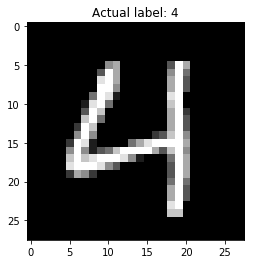

In [0]:
show_image(mnist, 205)

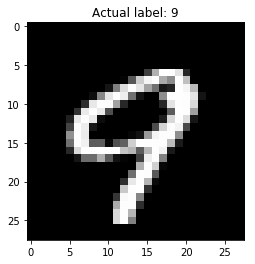

In [0]:
show_image(mnist, 100)

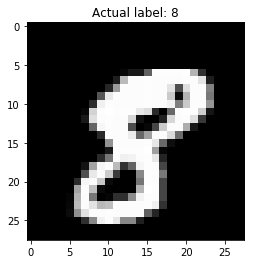

In [0]:
show_image(mnist, 10)

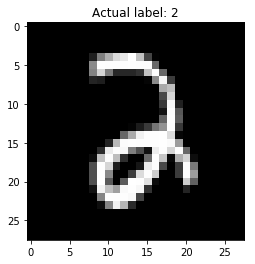

In [0]:
show_image(mnist, 4340)

Now you have an idea how the MNIST dataset look like, so next thing is to prepare the dataset for training our model.

In [0]:
from sklearn.model_selection import train_test_split


X, Y = mnist.iloc[:, 1:], mnist.iloc[:, 0];
train_x, test_x, train_y, test_y = train_test_split(X, Y,
                                                    test_size = 0.3,
                                                    random_state = 123,
                                                    shuffle = True
                                                   );


Now, lets create and train our SVM model.

In [0]:
from sklearn import svm

## can also use avm.SVC() with kernel = 'linear'
## with LinearSVC you get more options to work with
## for more details visi:
## https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
clf = svm.LinearSVC(C=1, max_iter = 5000)
# train the model
clf.fit(train_x, train_y);


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The above warning suggests us that our model didn't converged, i.e. the algorithm failed to find the best solution. To avoid this issue, what we can do is to set the `max_iter` value higher so that the model gets converged.

For the purpose of this tutorial, we will use the above trained model. However, I encourage you to use higher value for `max_iter` or alternatively use `svm.SVC()` with `kernel = 'linear'`.

In [0]:
# compute accuracy on test dataset
clf.acc = clf.score(test_x, test_y)

In [0]:
print('The accuracy on test dataset is %f' % clf.acc)

The accuracy on test dataset is 0.834603


So, we got 0.8346 ($\approx 83.5$%) accuracy on test dataset, which is a good start.Let's pick some random example from the test set and compare the predicted label with the true label.

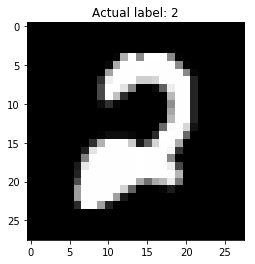

Predicted class label :  2


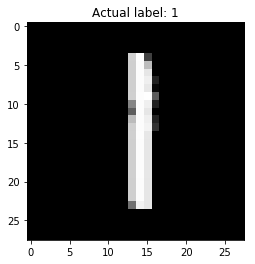

Predicted class label :  1


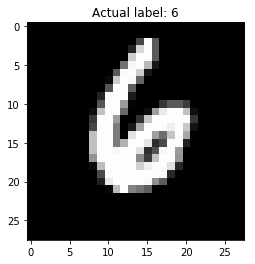

Predicted class label :  6


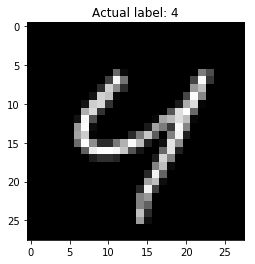

Predicted class label :  4


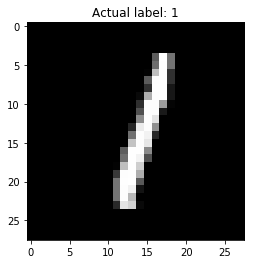

Predicted class label :  1


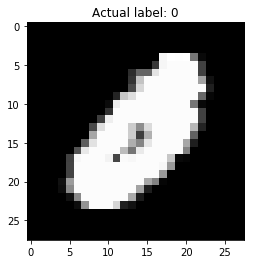

Predicted class label :  8


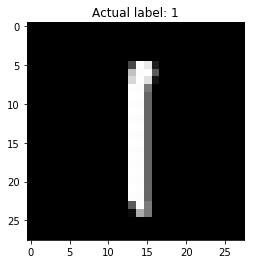

Predicted class label :  1


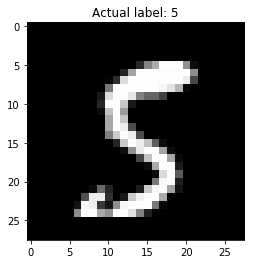

Predicted class label :  3


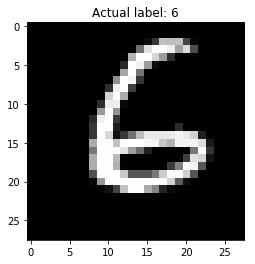

Predicted class label :  6


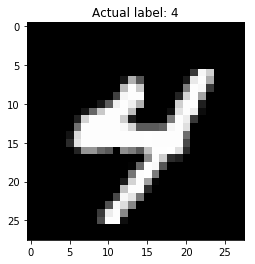

Predicted class label :  4


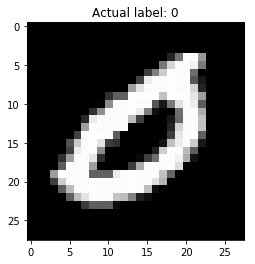

Predicted class label :  0


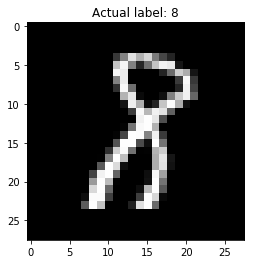

Predicted class label :  1


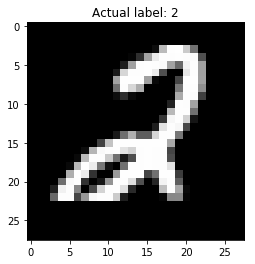

Predicted class label :  2


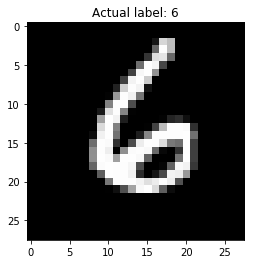

Predicted class label :  6


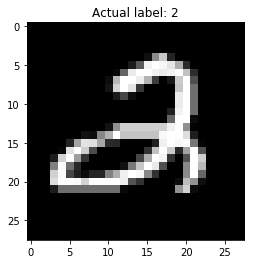

Predicted class label :  2


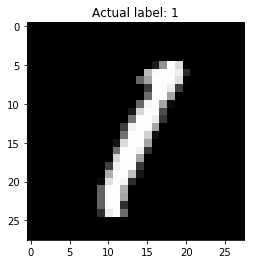

Predicted class label :  1


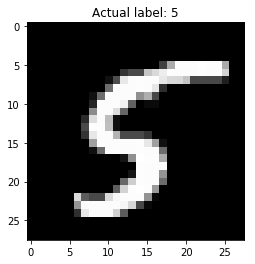

Predicted class label :  5


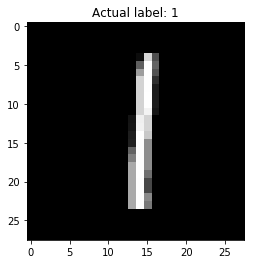

Predicted class label :  1


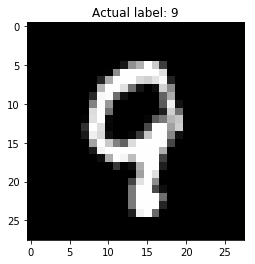

Predicted class label :  8


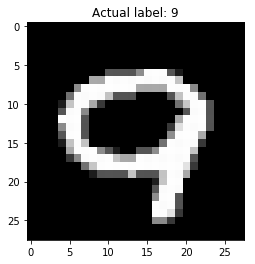

Predicted class label :  0


In [0]:
## pick random examples
np.random.seed(123)
num_rows = len(test_x)
indices = np.random.randint(0,num_rows,20)

clf.pred = clf.predict(test_x.iloc[indices, :])
for i, index in enumerate(indices):
  show_image(test_x, index, test_y)
  print('Predicted class label : ', clf.pred[i])
  print ('====================================')

Here, we have picked 20 random data points and shown the predicted class for each example along with the ground-truth information (true label). Now, let's compare the performance of our trained model among different classes. This will give us an indication about the strength and weakness of our model. That means, what digits our model can classify with greater accuracy and what digits it finds difficult or lets say gets confused.

In [0]:
## get all the predictions
clf.predictions = clf.predict(test_x)

In [0]:
print('Accuracy per class: \n')
print('=============================')
for i in range(0, 10):
  ## get the accuracy for current class, represented by i
  
  ## First get the index for all the occurance of current class in the true labels
  currentClass_idx = list(map(lambda x: x==i, test_y))
  currentClass_idx = np.where(currentClass_idx)[0]
  
  ## calculate the accuracy for the current class
  acc = sum(map(lambda x: test_y.iloc[x] == clf.predictions[x], currentClass_idx))/len(currentClass_idx)
  
  ## output result
  print('Accuracy for digit %d : %f' %(i, acc))
  
print('=============================')

Accuracy per class: 

Accuracy for digit 0 : 0.931652
Accuracy for digit 1 : 0.928470
Accuracy for digit 2 : 0.829719
Accuracy for digit 3 : 0.802839
Accuracy for digit 4 : 0.929810
Accuracy for digit 5 : 0.745164
Accuracy for digit 6 : 0.901652
Accuracy for digit 7 : 0.899846
Accuracy for digit 8 : 0.893290
Accuracy for digit 9 : 0.466129


From the above output, our model really struggled to recognize 9 and 5, compared to other digits. Now let's create a confusion matrix to investigate a little bit more about this problem.

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

def show_confusion_matrix(true_label = [], pred_label = [], class_labels = []):
  '''
  Function to calculate confusion matrix and show as a heat map
  
  Parameters:
  true_label (list) : true label for each of the examples
  pred_label (list) : a list of predicted classes for each examples
  class_labels (list) : a list for class labels
  '''
  
  ## check if all arguments are not empty;
  if len(true_label) < 1:
    raise ValueError('true_label can\'t be empty.')
    
  if len(pred_label) < 1:
    raise ValueError('pred_label can\'t be empty.')
  
  if len(class_labels) < 1:
    raise ValueError('class_labels can\'t be empty.')
  
  ## calculate the confusion matrix
  cmat = confusion_matrix(true_label, pred_label, labels=class_labels)

  ## generate the heat map of the confusion matrix
  cmat_df = pd.DataFrame(cmat, class_labels, class_labels)
  plt.figure(figsize=(10,7))
  cmat_df.columns.name = 'Predicted Classes'
  cmat_df.index.name = 'Actual Classes'
  sn.heatmap(cmat_df, annot=True, fmt='g', cmap="Greens")


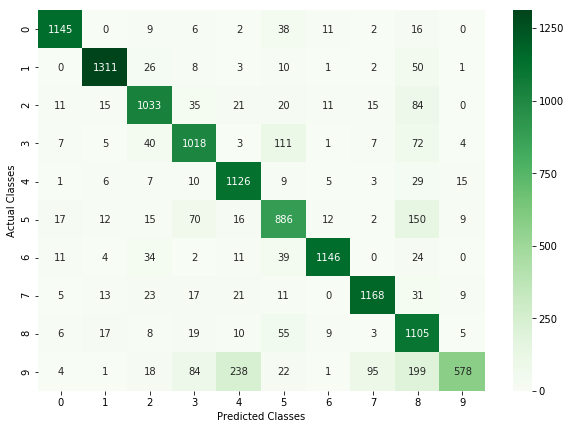

In [0]:
## define the class labels
class_labels = [0,1,2,3,4,5,6,7,8,9]

# generate the heat map of confusion matrix
show_confusion_matrix(test_y, clf.predictions, class_labels)

Form the above plot, it is clear that our trained model has problem identifying 5 and 9. In case of 9, it has predicted 238 times as 4, 199 times as 8, 95 times as 7 and 84 times as 3. Likewise it has predicted 150 times as 8 and 70 times as 3, when the actual class for each of those examples were 5. This is not good, specially our model couldn't recognize 9 even 50% of the time, when the actual class is 9.

So, from here on, you can try different values for `C` and see how it affect the test accuracy. You can also try using Cross Validation or Grid Search to determine the best value for `C` from a set of possible values. Also remember, the model failed to converge with the maximum iteration set to 5000. This means the model failed to reach the minimum of the cost function. In other words, the algorithm failed to find the best solution. Hence, you can try with larger value for `max_iter` or you may use `svm.SVC()` with `kernel = 'linear'` with this you don't have to set the `max_iter` value. However it might take more time compared to `LinearSVC()`.

Next, let's try using Radial Basis Function (RBF) kernel instead of linear SVM

In [0]:
## create RBF SVM model
clf_rbf = svm.SVC(C = 1,
                 kernel = 'rbf',
                 gamma = 'scale'
                 )

## train the model
clf_rbf.fit(train_x, train_y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
print('Accuracy on Test Dataset = %f' %(clf_rbf.score(test_x, test_y)))

Accuracy on Test Dataset = 0.976270


Here, with RBF kernel, we were able to significantly improve the accuracy on test dataset by more than 14%, to 0.9762 (compared to 0.8346 with linear SVM). Let's re-gnenerate all the statistics for our new model.

In [0]:
## get all the predictions
clf_rbf.predictions = clf_rbf.predict(test_x)

In [0]:

print('Accuracy per class (For RBF SVM): \n')
print('=============================')
for i in range(0, 10):
  ## get the accuracy for current class, represented by i
  
  ## First get the index for all the occurance of current class in the true labels
  currentClass_idx = list(map(lambda x: x==i, test_y))
  currentClass_idx = np.where(currentClass_idx)[0]
  
  ## calculate the accuracy for the current class
  acc = sum(map(lambda x: test_y.iloc[x] == clf_rbf.predictions[x], currentClass_idx))/len(currentClass_idx)
  
  ## output result
  print('Accuracy for digit %d : %f' %(i, acc))
  
print('=============================')

Accuracy per class (For RBF SVM): 

Accuracy for digit 0 : 0.991050
Accuracy for digit 1 : 0.985127
Accuracy for digit 2 : 0.974297
Accuracy for digit 3 : 0.966877
Accuracy for digit 4 : 0.983485
Accuracy for digit 5 : 0.961312
Accuracy for digit 6 : 0.991345
Accuracy for digit 7 : 0.976117
Accuracy for digit 8 : 0.969281
Accuracy for digit 9 : 0.962097


Compared to previous result (linear SVM), our new model with RBF kernel performed significantly better and achieved higher accuracy for all the classes.

And the Confusion Matrix

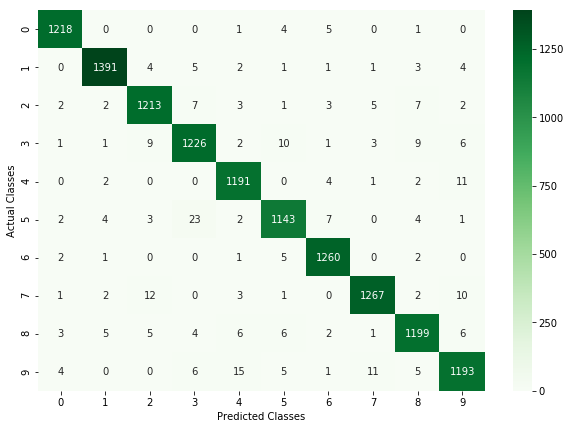

In [0]:
show_confusion_matrix(test_y, clf_rbf.predictions, class_labels)

## Next
In this tutorial, we looked at one of the most popular suvervised learning technique called Support Vector Machine, or in short SVM. We discussed about the idea behind it and also discussed about the way to extend it into the cases where the classes are not linearly separable in the input attribute space. Furthermore, we implemented SVM to recognize the handwritten digits using MNIST dataset and were able to significantly improve it's accuracy by replacing linear SVM with a Radial Basis Function (RBF) kernel. As discussed earlier, there are various parameters associated with SVM, for example $C$ for soft-margin SVM, gamma ($\gamma$) for RBF, polynomial and sigmoid kernel. And the value for these parameters must be fine tuned to improve the predictive accuracy of SVM. There are various techniques you can use, for example Cross Validation, Grid Search, for this purpose.

In addition to what we have done in this tutorial, I would highly encourage you to play around with SVM. This may include using Grid Search to fine tune the hyper-parameters or may even be using other datasets, like cifar-10 dataset which consists of labeled images of objects of 10 different common classes like horse, ship, bird, etc. In the next tutorial, we may look into Artificial Neural Network. Till then I encourage you to try SVM with other datasets as well.